In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [16]:
df.shape

(14640, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

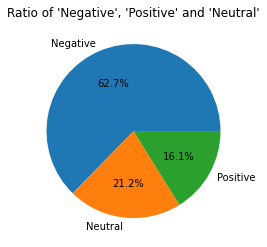

In [15]:
sentiment=['Negative','Neutral','Positive']
plt.pie(df.groupby('airline_sentiment')['airline_sentiment'].count(),autopct="%.1f%%",labels=sentiment)
plt.title("Ratio of 'Negative', 'Positive' and 'Neutral'")
plt.show()

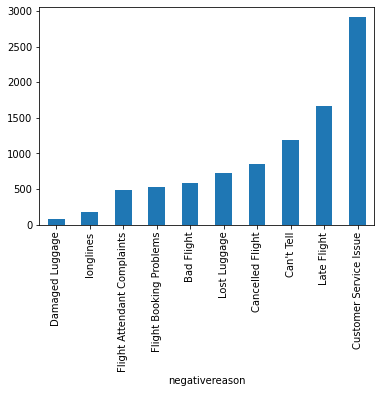

In [7]:
df.groupby('negativereason')['negativereason'].count().sort_values(ascending=True).plot.bar()


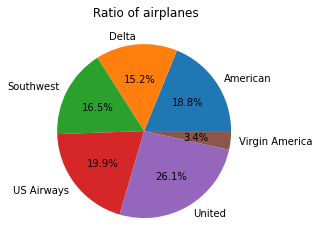

In [14]:
label=['American', 'Delta', 'Southwest', 'US Airways', 'United',
       'Virgin America']
plt.pie(df.groupby('airline')['airline_sentiment'].count(),autopct="%.1f%%",labels=label)
plt.title(' Ratio of airplanes')
plt.show()

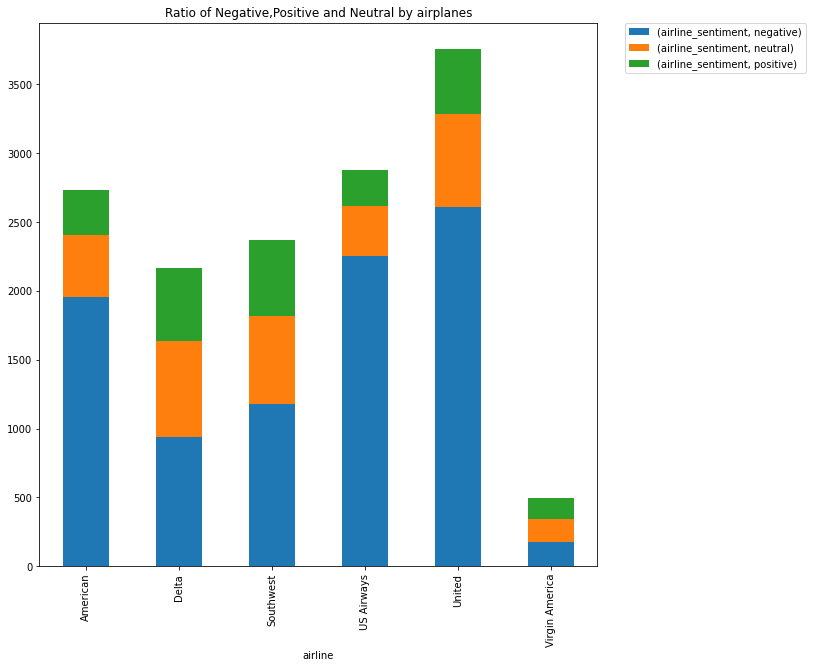

In [21]:
pd.DataFrame(df.groupby('airline')['airline_sentiment'].value_counts()).unstack().plot.bar(figsize=(10,10),stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.title('Ratio of Negative,Positive and Neutral by airplanes')
plt.show()


In [17]:
df=df.drop(df[df['airline_sentiment_confidence']<0.5].index,axis=0)

In [18]:
df.shape

(14404, 15)

In [19]:
X=df['text']
y=df['airline_sentiment']

In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

In [31]:
import re
cleaned_data=[]
for i in range(len(X)):
  tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
  tweet=tweet.lower().split()
  tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words)]
  tweet=' '.join(tweet)
  cleaned_data.append(tweet)

In [ ]:
cleaned_data

In [33]:
sentiment_ordering = ['negative', 'neutral', 'positive']

y = y.apply(lambda x: sentiment_ordering.index(x))

In [34]:
y.head()

0    1
2    1
3    0
4    0
5    0
Name: airline_sentiment, dtype: int64

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000,stop_words=['virginamerica','unit'])
X_final=cv.fit_transform(cleaned_data).toarray()
X_final.shape

(14404, 3000)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [44]:
y_pred=randomclassifier.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2719
           1       0.62      0.43      0.51       912
           2       0.72      0.61      0.66       691

    accuracy                           0.76      4322
   macro avg       0.71      0.65      0.67      4322
weighted avg       0.75      0.76      0.75      4322

